# Pymaceuticals, Analysis in Drug testing Data

Pymaceuticals specializes in drug-based, anti-cancer pharmaceuticals. In their most recent efforts, they've since begun screening for potential treatments to squamous cell carcinoma (SCC), a commonly occurring form of skin cancer.
#
As Data Analyst, you've been given access to the complete data from their most recent animal study. In this study, 250 mice were treated through a variety of drug regimes over the course of 45 days. Their physiological responses were then monitored over the course of that time. Your objective is to analyze the data to show how four treatments (Capomulin, Infubinol, Ketapril, and Placebo) compare.



1- Creating a scatter plot that shows how the tumor volume changes over time for each treatment.

2- Creating a scatter plot that shows how the number of metastatic (cancer spreading) sites changes over time for each treatment.

3- Creating a scatter plot that shows the number of mice still alive through the course of treatment (Survival Rate)


In [12]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings('ignore')


path_clinic_data = "Resources/Pymaceuticals_clinicaltrial_data.csv"
path_mouse_data = "Resources/Pymaceuticals_mouse_drug_data.csv"

clinic_data = pd.read_csv(path_clinic_data)
mouse_data = pd.read_csv(path_mouse_data)

clinic_data.head()
mouse_data.head()


merged_data = pd.merge(clinic_data, mouse_data, how="outer",on="Mouse ID" )

#merged_data.head(15)

#  1 - Scatter plot that shows how the tumor volume changes over time for each treatment.


In [13]:
#IMPORT
from scipy.stats import sem

#GROUP THE DATA FRAME BY DRUG AND TIME
grouped_drug = merged_data.groupby(["Drug", "Timepoint"])



#GETTING THE MEAN() OF TUMOR COLUMN AND PUT IN DATA FRAME
Tumor_mean = grouped_drug["Tumor Volume (mm3)"].mean()

df1 = pd.DataFrame({ "Tumor Volume (mm3)" : Tumor_mean})



#GETTING THE STANDARD ERROR OF TUMOR AND PUT IN A DATA FRAME
Standard_error = grouped_drug["Tumor Volume (mm3)"].sem()

df2 = pd.DataFrame({"Standard Error" : Standard_error})

#df1
#df2

In [14]:

#RESENTING THE INDEX 
ResetIndex_by_drugs = df1.reset_index()
ResetIndex_by_error = df2.reset_index()


#SETING THE INDEX BY TIME AND SETTING COLUMNS BY DRUGS

Mean_index = ResetIndex_by_drugs.pivot(columns= "Drug", index= "Timepoint")["Tumor Volume (mm3)"]
df3 = pd.DataFrame(Mean_index)



#SETING THE INDEX BY TIME AND SETTING COLUMNS BY ERROR

Error_index = ResetIndex_by_error.pivot(columns= "Drug", index= "Timepoint")["Standard Error"]
df4 = pd.DataFrame(Error_index)


#df3.head(5)
#df4

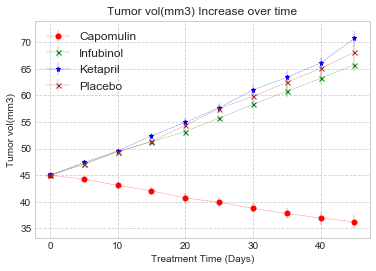

In [35]:
#PLOTTING THE ERROR BAR USING MEAN AS REFERENCE REMOVING THE NOISE IN THE GRAPH
x_axis = np.arange(0, 50, 10)

plt.errorbar(df3.index, df3["Capomulin"], yerr=df4["Capomulin"],
             color="red", marker="o", markersize=5, linestyle="dashed", linewidth=0.3)


plt.errorbar(df3.index, df3["Infubinol"], yerr= df4["Infubinol"],
            color="green", marker="x", markersize=5, linestyle="dashed",linewidth=0.3)


plt.errorbar(df3.index, df3["Ketapril"], yerr=df4["Ketapril"],
             color="blue", marker="*", markersize=5, linestyle="dashed", linewidth=0.3)


plt.errorbar(df3.index, df3["Placebo"], yerr= df4["Placebo"],
            color="brown", marker="x", markersize=5, linestyle="dashed",linewidth=0.3)



#PUTTING LEGEND, LABELS, CUSTOMIZING.. 
plt.title('Tumor vol(mm3) Increase over time')
plt.xlabel('Treatment Time (Days)') 
plt.ylabel("Tumor vol(mm3)") 

plt.style.use('seaborn-whitegrid')
plt.grid(linestyle="dashed")
plt.legend(loc='best', fontsize=12, fancybox=True)

plt.savefig("MetastaticSpreadDuringTreatment.png")
plt.figure(figsize=(3,3))

plt.show()

#  2 - Scatter plot that shows how the number of metastatic (cancer spreading) sites changes over time for each treatment.

In [6]:
#GETTING THE MEAN() OF METASTATIC COLUMN AND PUT IN DATA FRAME
grouped_drug2 = merged_data.groupby(["Drug","Timepoint"])

Tumor_mean2 = grouped_drug2["Metastatic Sites"].mean()

df3 = pd.DataFrame({ "Metastatic Mean()" : Tumor_mean2})



#GETTING THE STANDARD ERROR OF TUMOR AND PUT IN A DATA FRAME
Standard_error2 = grouped_drug2["Metastatic Sites"].sem()

df4 = pd.DataFrame({"Metastatic Sem()" : Standard_error2})

#df3.head(5)
#df4

In [7]:
#RESENTING THE INDEX 
ResetIndex_df3 = df3.reset_index()
ResetIndex_df4 = df4.reset_index()


#SETING THE INDEX BY TIME AND SETTING COLUMNS BY DRUGS

Mean_index2 = ResetIndex_df3.pivot(columns= "Drug", index="Timepoint")["Metastatic Mean()"]
df3_met = pd.DataFrame(Mean_index2)



#SETING THE INDEX BY TIME AND SETTING COLUMNS BY ERROR

Error_index2 = ResetIndex_df4.pivot(columns= "Drug", index= "Timepoint")["Metastatic Sem()"]
df4_met = pd.DataFrame(Error_index2)


#df3_met
#df4_met

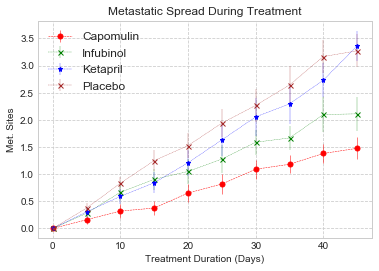

In [25]:
#PLOTING THE ERROR BAR 

plt.errorbar(df3_met.index, df3_met["Capomulin"], yerr=df4_met["Capomulin"],
             color="red", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)


plt.errorbar(df3_met.index, df3_met["Infubinol"], yerr= df4_met["Infubinol"],
            color="green", marker="x", markersize=5, linestyle="dashed",linewidth=0.3)


plt.errorbar(df3_met.index, df3_met["Ketapril"], yerr=df4_met["Ketapril"],
             color="blue", marker="*", markersize=5, linestyle="dashed", linewidth=0.3)


plt.errorbar(df3_met.index, df3_met["Placebo"], yerr= df4_met["Placebo"],
            color="brown", marker="x", markersize=5, linestyle="dashed",linewidth=0.3)


# Set x and y axis labels including the title of the chart
plt.title('Metastatic Spread During Treatment') # Give plot main title
plt.xlabel('Treatment Duration (Days)') # set text for the x axis
plt.ylabel('Met. Sites') # set text for the y axis

plt.style.use('seaborn-whitegrid')
plt.grid(linestyle="dashed")
plt.legend(loc='best', fontsize=12, fancybox=True)


# Save the Figure
plt.savefig("MetastaticSpreadDuringTreatment.png")

# Show the Figure
plt.show()

# 3 - Scatter plot that shows the number of mice still alive through the course of treatment (Survival Rate)

In [36]:
#COUNTING NUMBER OF MOUSES AND PUTTING IN DATA FRAME

grouped_drug3= merged_data.groupby(["Drug","Timepoint"])
mouse_count = grouped_drug3["Mouse ID"].count()

df5 = pd.DataFrame({ "Mouse Count" : mouse_count })


#RESET INDEX --> DATA MUNGING TO HAVE "TIMEPOINT AS INDEX AN "DRUGS AS COLUMNS

ResetIndex_df5 = df5.reset_index()
df5_mouse = ResetIndex_df5.pivot(columns="Drug", index="Timepoint")['Mouse Count']

#df5_mouse

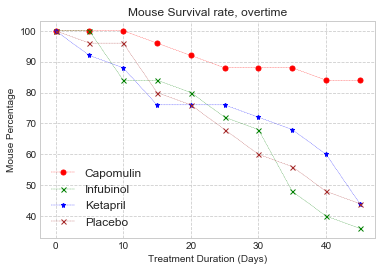

In [34]:
#MAKING A REGULAR PLOT CALCULATING THE PERCENTAGE

plt.plot((100*df5_mouse["Capomulin"]/ 25),  
         color="red", marker="o", markersize=5, linestyle="dashed",linewidth=0.3)

plt.plot(100*df5_mouse["Infubinol"]/25,
            color="green", marker="x", markersize=5, linestyle="dashed",linewidth=0.3)


plt.plot(100* df5_mouse["Ketapril"]/25,
             color="blue", marker="*", markersize=5, linestyle="dashed", linewidth=0.3)


plt.plot(100* df5_mouse["Placebo"]/25,
            color="brown", marker="x", markersize=5, linestyle="dashed", linewidth=0.3)


plt.title('Mouse Survival rate, overtime') 
plt.xlabel('Treatment Duration (Days)') # set text for the x axis
plt.ylabel('Mouse Percentage') # set text for the y axis

plt.style.use('seaborn-whitegrid')
plt.grid(linestyle="dashed")
plt.legend(loc='best', fontsize=12, fancybox=True)


# Save the Figure
plt.savefig("MetastaticSpreadDuringTreatment.png")

plt.show()